In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, LSTM, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("train_FD001.csv")
temp_df = pd.read_csv("train_FD001_selected_features.csv")
drop_columns = [x for x in df if x not in temp_df.columns and x!='unit_number']
print(drop_columns)

['op_setting1', 'op_setting2', 'op_setting3', 'sen_measurement1', 'sen_measurement5', 'sen_measurement6', 'sen_measurement9', 'sen_measurement10', 'sen_measurement14', 'sen_measurement16', 'sen_measurement18', 'sen_measurement19']


In [5]:
df.drop(drop_columns, axis=1, inplace=True)
df

,unit_number,time,sen_measurement2,sen_measurement3,sen_measurement4,sen_measurement7,sen_measurement8,sen_measurement11,sen_measurement12,sen_measurement13,sen_measurement15,sen_measurement17,sen_measurement20,sen_measurement21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [6]:
X_Columns = [column for column in df.columns if column!='RUL']

In [7]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

In [8]:
df[X_Columns] = min_max_scaler.fit_transform(df[X_Columns])

In [9]:
df

,unit_number,time,sen_measurement2,sen_measurement3,sen_measurement4,sen_measurement7,sen_measurement8,sen_measurement11,sen_measurement12,sen_measurement13,sen_measurement15,sen_measurement17,sen_measurement20,sen_measurement21,RUL
0,-1.0,-1.000000,-0.632530,-0.186396,-0.380486,0.452496,-0.515152,-0.261905,0.266525,-5.882353e-01,-0.272028,-0.333333,0.426357,0.449323,191
1,-1.0,-0.994460,-0.433735,-0.093961,-0.294733,0.256039,-0.575758,-0.238095,0.530917,-4.411765e-01,-0.177376,-0.333333,0.333333,0.462027,190
2,-1.0,-0.988920,-0.313253,-0.260955,-0.258947,0.420290,-0.454545,-0.500000,0.590618,-5.588235e-01,-0.285110,-0.666667,0.255814,0.242751,189
3,-1.0,-0.983380,-0.313253,-0.487683,-0.337610,0.481481,-0.363636,-0.666667,0.778252,-4.117647e-01,-0.666795,-0.333333,0.147287,0.324772,188
4,-1.0,-0.977839,-0.301205,-0.485066,-0.190749,0.336554,-0.515152,-0.488095,0.492537,-5.294118e-01,-0.195845,-0.166667,0.178295,0.409003,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,1.0,0.080332,0.373494,0.174624,0.565834,-0.491143,-0.121212,0.452381,-0.658849,1.176471e-01,0.313582,0.500000,-0.457364,-0.781000,4
20627,1.0,0.085873,0.403614,0.458906,0.732951,-0.674718,0.000000,0.416667,-0.577825,-9.094947e-13,0.454406,0.166667,-0.751938,-0.267606,3
20628,1.0,0.091413,0.331325,0.369959,0.550641,-0.648953,0.030303,0.476190,-0.437100,5.882353e-02,0.844556,0.666667,-0.534884,-0.892019,2
20629,1.0,0.096953,0.216867,0.492043,0.494936,-0.732689,0.060606,0.833333,-0.582090,2.941176e-02,0.646787,0.166667,-0.767442,-0.531069,1


In [10]:
def gen_train(id_df, seq_len, seq_cols):
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array = []

    for start in range(num_elements - seq_len + 1):
        stop = start + seq_len
        lstm_array.append(data_array[start:stop, :])

    return np.array(lstm_array)

def gen_target(id_df, seq_len, label):
    data_array = id_df[label].values
    return data_array[seq_len - 1: data_array.shape[0]+1]

sequence_length = 50
X_Columns = [column for column in df.columns if column!='RUL']

X_train_list = []
y_train_list = []

# Iterate through each unique unit
for unit in df["unit_number"].unique():
    unit_df = df[df["unit_number"] == unit]
    X_train_list.append(gen_train(unit_df, sequence_length, X_Columns))
    y_train_list.append(gen_target(unit_df, sequence_length, 'RUL'))

# Concatenate all units' data
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (15731, 50, 14)
y_train shape: (15731,)


In [12]:
model = Sequential()
model.add(LSTM(units=256,
               return_sequences=True,
               input_shape=(X_train.shape[1], X_train.shape[2])
               ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu'))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
model.summary()

C:\Users\DeTa5\anaconda3\envs\Web Scraping tut\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50, 256)        │       277,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,777 (1.81 MB)

 Trainable params: 475,265 (1.81 MB)

 Non-trainable params: 512 (2.00 KB)

In [48]:
#X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float64)

for i in range(0,10):
    print(type(X_train[i,i,i]))

for i in range(0,10):
    print(type(y_train[i]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [13]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

history = model.fit(X_train, y_train, epochs= 10, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - loss: 6286.3540 - mse: 6286.3540 - val_loss: 5298.1494 - val_mse: 5298.1494
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - loss: 2216.2522 - mse: 2216.2522 - val_loss: 2257.3398 - val_mse: 2257.3398
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - loss: 1059.7860 - mse: 1059.7860 - val_loss: 1620.6758 - val_mse: 1620.6758
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - loss: 810.3035 - mse: 810.3035 - val_loss: 1283.0972 - val_mse: 1283.0972
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - loss: 673.9893 - mse: 673.9893 - val_loss: 1137.0065 - val_mse: 1137.0065
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - loss: 578.4753 - mse: 578.4753 - val_loss: 1333.4153 - val_mse: 1333.4153
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - loss: 589.7236 - mse: 589.7236 - val_loss: 940.8450 - val_mse: 940.8450
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - loss: 529.6664 - mse: 529.6664

In [16]:
model.save('LSTM_model.keras')

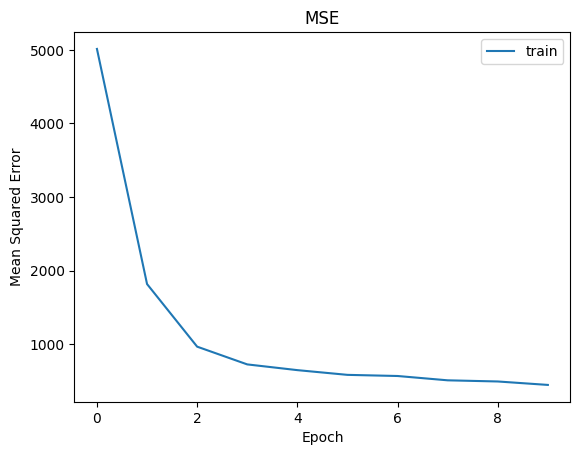

In [17]:
plt.plot(history.history['mse'])
plt.title('MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

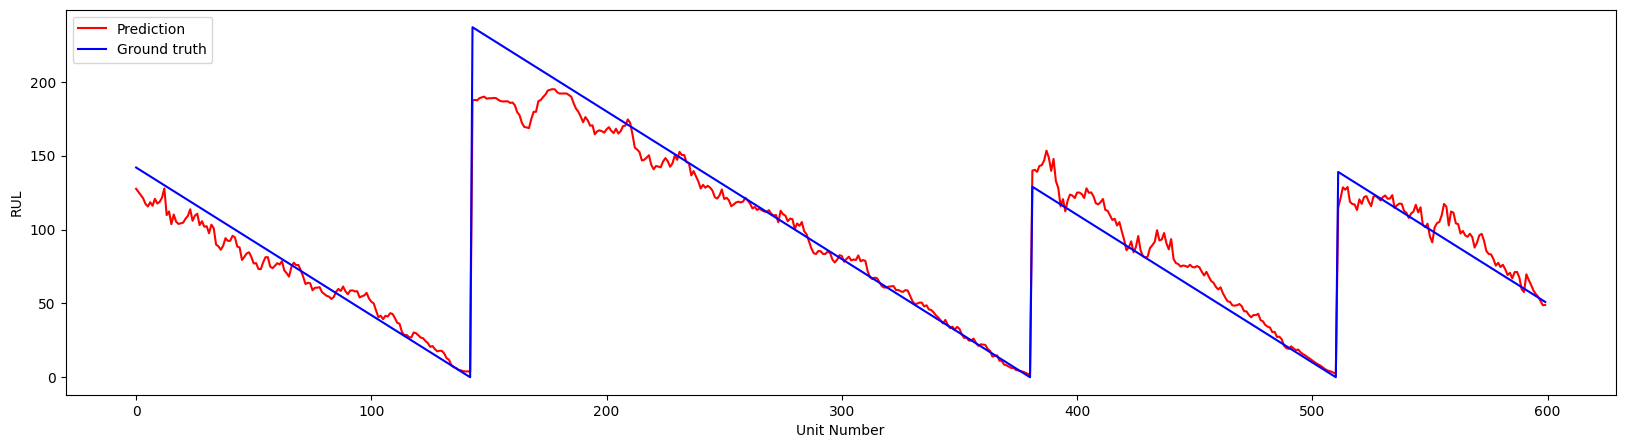

In [18]:
y_pred = model.predict(X_train[0:600], verbose=0)
plt.figure(figsize=(20,5))
plt.plot(y_pred, color='red', label='Prediction')
plt.plot(y_train[0:600],color='blue',label='Ground truth')
plt.ylabel('RUL')
plt.xlabel('Unit Number')
plt.legend(loc='upper left')
plt.show()

# Predict on testing data

In [8]:
def gen_train(id_df, seq_len, seq_cols):
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array = []

    for start in range(num_elements - seq_len + 1):
        stop = start + seq_len
        lstm_array.append(data_array[start:stop, :])

    return np.array(lstm_array)

def gen_target(id_df, seq_len, label):
    data_array = id_df[label].values
    return data_array[seq_len - 1:]

def data_prep(path,file_no):

    df = pd.read_csv(f"test_FD00{file_no}.csv")
    temp_df = pd.read_csv(path)
    drop_columns = [x for x in df if x not in temp_df.columns and x!='unit_number']
    df.drop(drop_columns, axis=1, inplace=True)
    min_max_scaler = MinMaxScaler(feature_range=(-1,1))
    X_Columns = [column for column in df.columns if column!='RUL']
    df[X_Columns] = min_max_scaler.fit_transform(df[X_Columns])


    sequence_length = 50
    X_Columns = [column for column in df.columns if column!='RUL']
    X_list = []
    y_list = []

    # Iterate through each unique unit
    for unit in df["unit_number"].unique():
        unit_df = df[df["unit_number"] == unit]
        X_unit = gen_train(unit_df, sequence_length, X_Columns)
        y_unit = gen_target(unit_df, sequence_length, 'RUL')
        if X_unit.size == 0 or y_unit.size == 0:
            print(f"Skipping unit {unit} due to insufficient data.")
            continue
        #print(f"Unit {unit} - X_unit shape: {X_unit.shape}, y_unit shape: {y_unit.shape}") #-->To check Dimension issue
        X_list.append(X_unit)
        y_list.append(y_unit)


    # Concatenate all units' data
    X = np.concatenate(X_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    return X, y

X, y = data_prep('processed_test_data_FD001.csv',1)
print("X_shape",X.shape)
print("y_shape",y.shape)

Skipping unit -0.9999999999999999 due to insufficient data.
Skipping unit -0.9797979797979797 due to insufficient data.
Skipping unit -0.7373737373737372 due to insufficient data.
Skipping unit -0.5757575757575757 due to insufficient data.
Skipping unit -0.515151515151515 due to insufficient data.
Skipping unit -0.23232323232323215 due to insufficient data.
Skipping unit 0.6969696969696972 due to insufficient data.
X_shape (8255, 50, 14)
y_shape (8255,)


In [2]:
from tensorflow.keras.models import load_model
model = load_model('LSTM_model.keras')

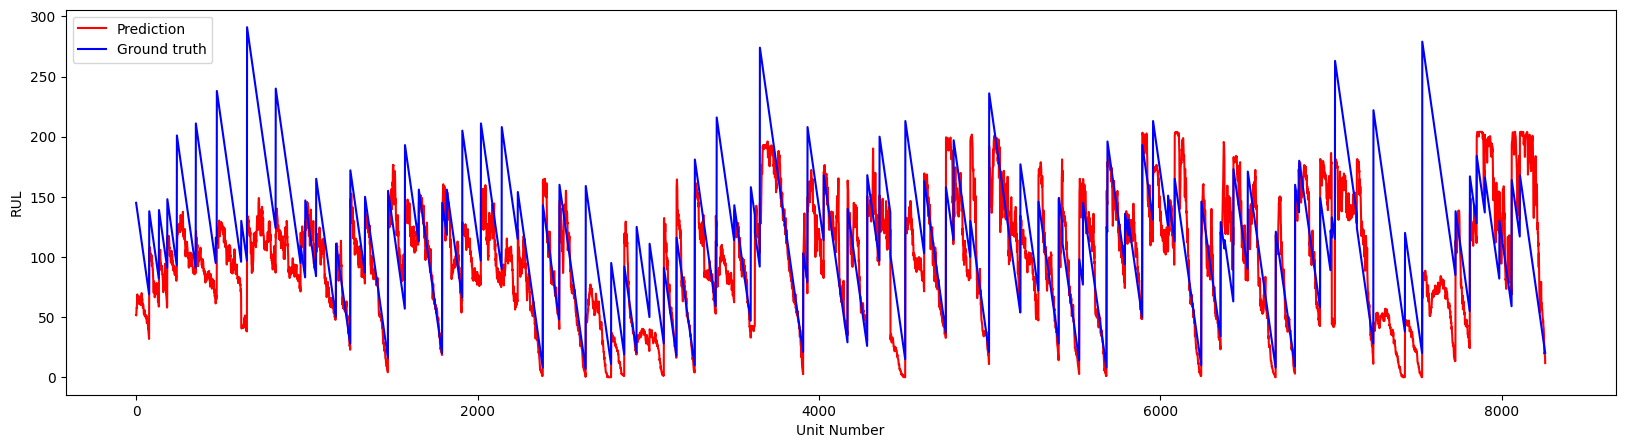

In [9]:
y_pred = model.predict(X, verbose=0)
plt.figure(figsize=(20,5))
plt.plot(y_pred, color='red', label='Prediction')
plt.plot(y,color='blue',label='Ground truth')
plt.ylabel('RUL')
plt.xlabel('Unit Number')
plt.legend(loc='upper left')
plt.show()